# Example: Monarch-KG notebook

Illustrates use of LinkML-Store over the Monarch-KG database (duckdb serialization)

First we initialize a `Client` object:

In [9]:
from linkml_store.api.client import Client

client = Client()

Next we download the dump (using pystow, to cache if needed)

In [11]:
from linkml_store.constants import LINKML_STORE_MODULE

MONARCH_KG_DB = "https://data.monarchinitiative.org/monarch-kg/latest/monarch-kg.duckdb.gz"

path = LINKML_STORE_MODULE.ensure_gunzip(url=MONARCH_KG_DB, autoclean=True)

In [12]:
database = client.attach_database(f"duckdb:///{path}", "monarch-kg")

In [13]:
edges_coll = database.get_collection("denormalized_edges")

/Users/cjm/Library/Caches/pypoetry/virtualenvs/linkml-store-8ZYO4kTy-py3.10/lib/python3.10/site-packages/duckdb_engine/__init__.py:588: SAWarning: Did not recognize type 'list' of column 'closure'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]
/Users/cjm/Library/Caches/pypoetry/virtualenvs/linkml-store-8ZYO4kTy-py3.10/lib/python3.10/site-packages/duckdb_engine/__init__.py:588: SAWarning: Did not recognize type 'list' of column 'closure_label'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]


In [14]:
qr = edges_coll.find()
qr.rows_dataframe

,agent_type,aggregator_knowledge_source,category,evidence_count,frequency_qualifier,frequency_qualifier_category,frequency_qualifier_closure,frequency_qualifier_closure_label,frequency_qualifier_label,frequency_qualifier_namespace,...,stage_qualifier_label,stage_qualifier_namespace,subject,subject_category,subject_closure,subject_closure_label,subject_label,subject_namespace,subject_taxon,subject_taxon_label
0,not_provided,infores:monarchinitiative,biolink:PairwiseGeneToGeneInteraction,4,None,None,None,None,None,None,...,None,None,FB:FBgn0033485,biolink:Gene,None,None,RpLP0-like,FB,NCBITaxon:7227,Drosophila melanogaster
1,not_provided,infores:monarchinitiative,biolink:PairwiseGeneToGeneInteraction,2,None,None,None,None,None,None,...,None,None,FB:FBgn0033485,biolink:Gene,None,None,RpLP0-like,FB,NCBITaxon:7227,Drosophila melanogaster
2,not_provided,infores:monarchinitiative,biolink:PairwiseGeneToGeneInteraction,4,None,None,None,None,None,None,...,None,None,FB:FBgn0033485,biolink:Gene,None,None,RpLP0-like,FB,NCBITaxon:7227,Drosophila melanogaster
3,not_provided,infores:monarchinitiative,biolink:PairwiseGeneToGeneInteraction,2,None,None,None,None,None,None,...,None,None,FB:FBgn0033485,biolink:Gene,None,None,RpLP0-like,FB,NCBITaxon:7227,Drosophila melanogaster
4,not_provided,infores:monarchinitiative,biolink:PairwiseGeneToGeneInteraction,4,None,None,None,None,None,None,...,None,None,FB:FBgn0033485,biolink:Gene,None,None,RpLP0-like,FB,NCBITaxon:7227,Drosophila melanogaster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,not_provided,infores:monarchinitiative,biolink:PairwiseGeneToGeneInteraction,3,None,None,None,None,None,None,...,None,None,FB:FBgn0050000,biolink:Gene,None,None,GstT1,FB,NCBITaxon:7227,Drosophila melanogaster
96,not_provided,infores:monarchinitiative,biolink:PairwiseGeneToGeneInteraction,4,None,None,None,None,None,None,...,None,None,FB:FBgn0050000,biolink:Gene,None,None,GstT1,FB,NCBITaxon:7227,Drosophila melanogaster
97,not_provided,infores:monarchinitiative,biolink:PairwiseGeneToGeneInteraction,3,None,None,None,None,None,None,...,None,None,FB:FBgn0050000,biolink:Gene,None,None,GstT1,FB,NCBITaxon:7227,Drosophila melanogaster
98,not_provided,infores:monarchinitiative,biolink:PairwiseGeneToGeneInteraction,4,None,None,None,None,None,None,...,None,None,FB:FBgn0050000,biolink:Gene,None,None,GstT1,FB,NCBITaxon:7227,Drosophila melanogaster


In [15]:
key = ("subject_category", "object_category")
facets = edges_coll.query_facets(facet_columns=[key])

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def heatmap(data):
    
    # Convert data into a DataFrame
    df = pd.DataFrame(data, columns=['Source', 'Target', 'Value'])
    
    # Pivot the data to create a matrix suitable for a heatmap
    pivot_df = df.pivot(index='Source', columns='Target', values='Value').fillna(0)

    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Frequency'})
    plt.title("Heatmap of Biolink Data Frequencies")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    plt.show()


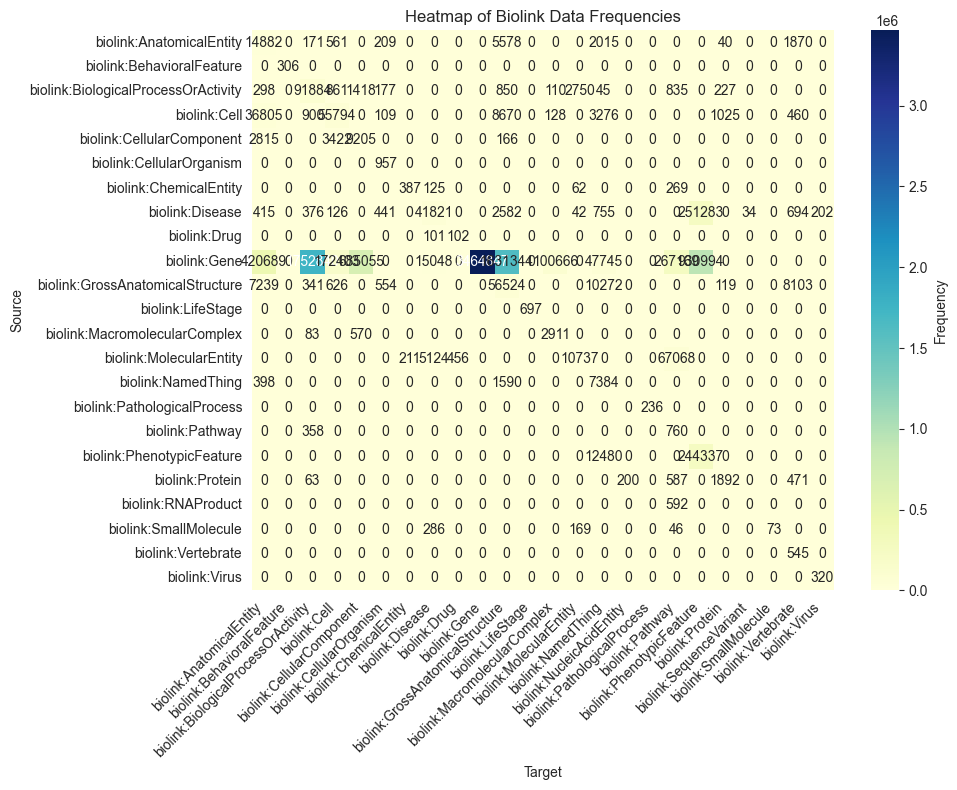

In [17]:
heatmap(facets[key])

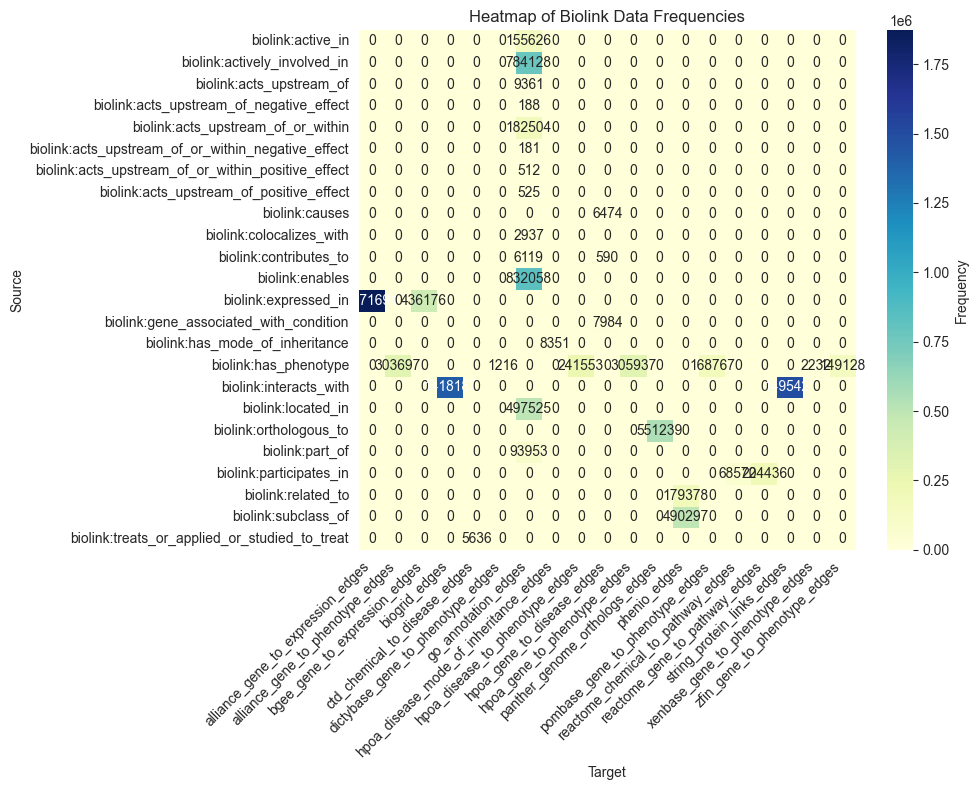

In [18]:
key = ("predicate", "provided_by")
facets = edges_coll.query_facets(facet_columns=[key])
heatmap(facets[key])

In [21]:
key = ("subject_category", "predicate", "object_category")
edges_coll.query_facets(facet_columns=[key])[key]

[('biolink:Gene', 'biolink:interacts_with', 'biolink:Gene', 2913608),
 ('biolink:Gene', 'biolink:expressed_in', 'biolink:GrossAnatomicalStructure', 1631344),
 ('biolink:Gene', 'biolink:has_phenotype', 'biolink:PhenotypicFeature', 930989),
 ('biolink:Gene', 'biolink:enables', 'biolink:BiologicalProcessOrActivity', 832057),
 ('biolink:Gene', 'biolink:actively_involved_in', 'biolink:BiologicalProcessOrActivity', 734740),
 ('biolink:Gene', 'biolink:orthologous_to', 'biolink:Gene', 551239),
 ('biolink:Gene', 'biolink:located_in', 'biolink:CellularComponent', 497519),
 ('biolink:Gene', 'biolink:expressed_in', 'biolink:AnatomicalEntity', 420689),
 ('biolink:PhenotypicFeature', 'biolink:subclass_of', 'biolink:PhenotypicFeature', 244059),
 ('biolink:Disease', 'biolink:has_phenotype', 'biolink:PhenotypicFeature', 241541),
 ('biolink:Gene', 'biolink:participates_in', 'biolink:Pathway', 204436),
 ('biolink:Gene', 'biolink:expressed_in', 'biolink:Cell', 172403),
 ('biolink:Gene', 'biolink:acts_upst